<a href="https://colab.research.google.com/github/kukretinishtha/MachineLearning/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Loading required libraries
import numpy as np
import pandas as pd

In [2]:
### Loading the dataset from drive
from google.colab import files
uploaded = files.upload()

Saving wine_train.csv to wine_train.csv


In [3]:
### Read the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['wine_train.csv']))
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6


**DATA INFORMATION**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         3673 non-null   float64
 1   volatile.acidity      3673 non-null   float64
 2   citric.acid           3673 non-null   float64
 3   residual.sugar        3673 non-null   float64
 4   chlorides             3673 non-null   float64
 5   free.sulfur.dioxide   3673 non-null   float64
 6   total.sulfur.dioxide  3673 non-null   float64
 7   density               3673 non-null   float64
 8   pH                    3673 non-null   float64
 9   sulphates             3673 non-null   float64
 10  alcohol               3673 non-null   float64
 11  quality               3673 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 344.5 KB


In [5]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.854724,0.277953,0.335108,6.413613,0.045710,35.368500,138.626736,0.994026,3.189834,0.489115,10.525709,5.893820
std,0.848973,0.099913,0.123156,5.054275,0.021747,16.974746,42.641142,0.003016,0.152739,0.112433,1.243642,0.892749
min,3.800000,0.080000,0.000000,0.600000,0.012000,3.000000,9.000000,0.987110,2.720000,0.250000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991700,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.010000,14.200000,9.000000


**DATA** **VISUALIZATION**

In [6]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

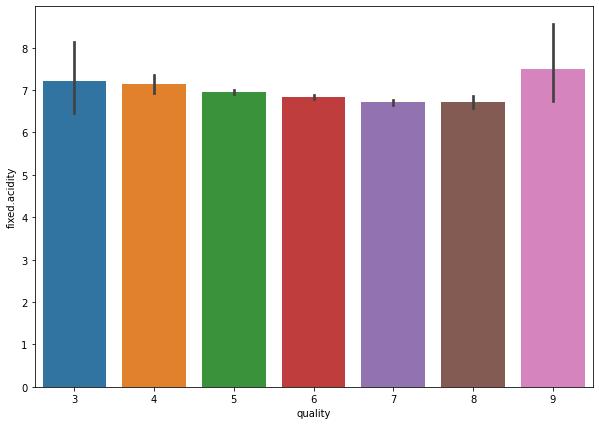

In [7]:
# fixed.acidity vs quality
fig = plt.figure(figsize = (10,7))
sns.barplot(x = 'quality', y = 'fixed.acidity', data = df)

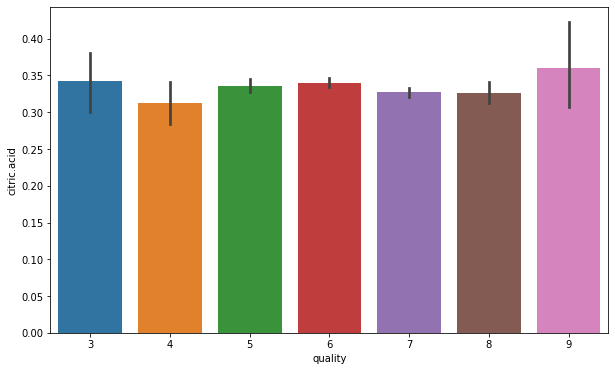

In [8]:
# citric.acid vs quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric.acid', data = df)

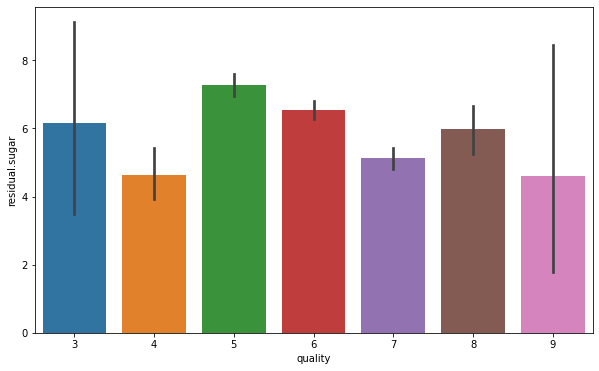

In [9]:
# residual.sugar vs quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual.sugar', data = df)

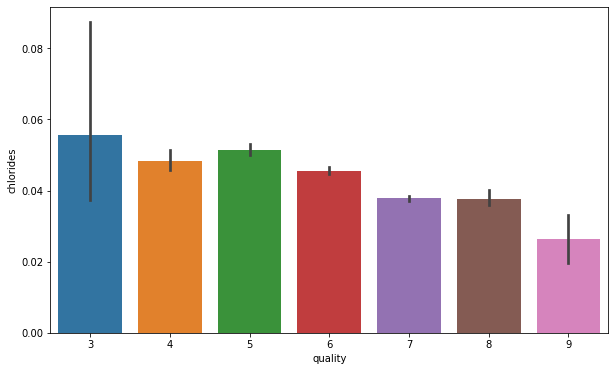

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

"From the above graph, we can say that as the quantity of chlorides decrease in wine, the quality of wine increases!!!"

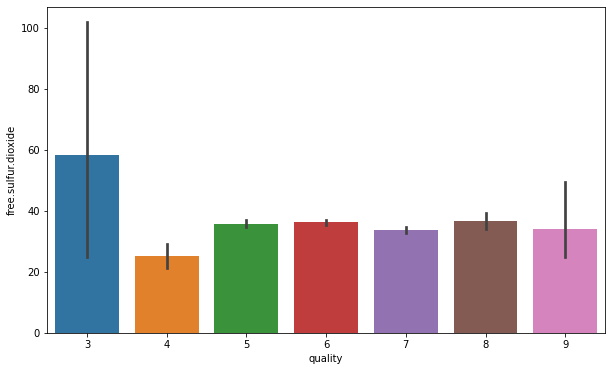

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free.sulfur.dioxide', data = df)

"With decrease in free.sulphur.dioxide the quality of wine increases!!!"

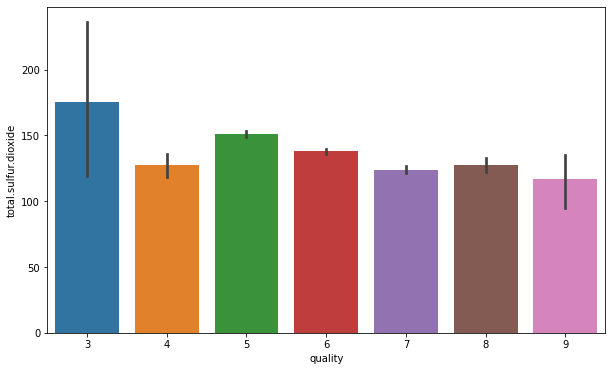

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total.sulfur.dioxide', data = df)

"With deccrease in total.sulfur.dioxide the quality of wine increase!!!"

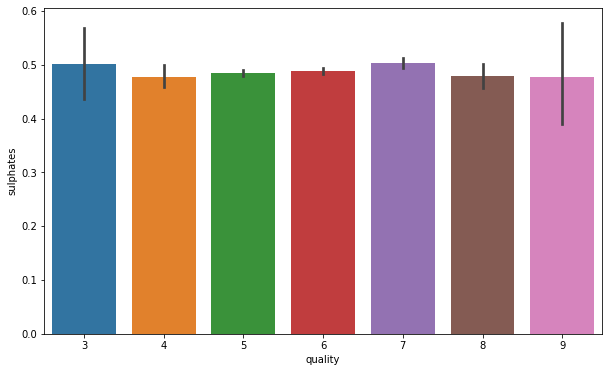

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

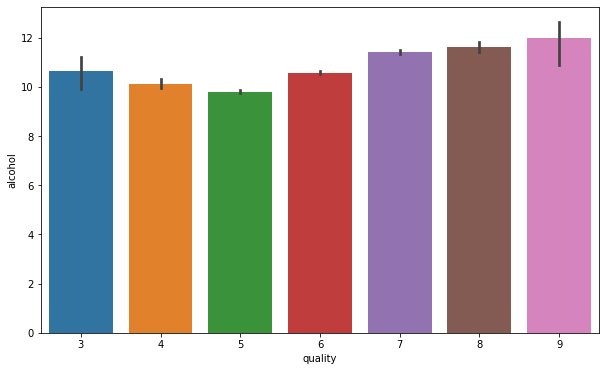

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

"With increase in the quantity of alcohol the quality of wine increase!!!"

In [15]:
training_data=df.iloc[:3000]
training_features_data=training_data.drop('quality', axis='columns')
training_labels_data=training_data['quality'].copy()
testing_data=df.iloc[3000:]

In [16]:
testing_features_data=testing_data.drop('quality', axis='columns')
testing_labels_data=testing_data['quality'].copy()

**Creating pipeline (imputation and scaling)**

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
my_pipeline=Pipeline([('imputer', SimpleImputer()),('scaler', StandardScaler())])
x_train=my_pipeline.fit_transform(training_features_data)
x_test=my_pipeline.fit_transform(testing_features_data)

**Correlation**

In [19]:
correlation=df.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.436661
pH                      0.090143
sulphates               0.035366
free.sulfur.dioxide     0.007264
citric.acid            -0.008268
residual.sugar         -0.089946
fixed.acidity          -0.112055
total.sulfur.dioxide   -0.179859
volatile.acidity       -0.189077
chlorides              -0.211490
density                -0.306094
Name: quality, dtype: float64

**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model=LinearRegression()
model.fit(x_train, training_labels_data)
x=model.predict(x_test)
scores=cross_val_score(model, training_features_data, training_labels_data, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print("RMSE SCORE", len(list(rmse_scores)))
print("RMSE",list(rmse_scores))

RMSE SCORE 10
RMSE [0.7579297565879948, 0.7119038105882651, 0.8018856981189952, 0.8281104442195849, 0.7617899846275358, 0.7396527459836639, 0.7589729083542426, 0.8273574939318068, 0.7881182904079134, 0.6965972580497273]


In [21]:
def print_scores_of_validation(scores):
    print("Scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [22]:
print_scores_of_validation(rmse_scores)

Scores: [0.75792976 0.71190381 0.8018857  0.82811044 0.76178998 0.73965275
 0.75897291 0.82735749 0.78811829 0.69659726]
mean: 0.767231839086973
standard deviation: 0.04237195574420826


In [23]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(testing_labels_data, x)
lin_rmse=np.sqrt(lin_mse)

print("mse", lin_mse)
print("lin_rmse", lin_rmse)

mse 0.5288955065000532
lin_rmse 0.727252024060472


In [46]:
!ls

 sample_data  'Testing and predicted data.csv'	 wine_train.csv


In [47]:
def predict_quality(parameters): #enter space seperated 11 integer values as parameters
        
        x=parameters.split()
        arr=np.array(x)

        z=np.reshape(arr, (1,-1))
        y=my_pipeline.fit_transform(z)
        output=model2.predict(y)
        if output<6:
            print("Bad")
        elif output==6:
            print("Average")
        else:
            print("Good")

In [48]:
truth_quality=df2['quality']

In [49]:
truth_label=[]
for values in truth_quality:
    if values>6:
        truth_label.append('good')
    elif values<6:
        truth_label.append('bad')
    else:
        truth_label.append('average')

In [50]:
df2['truth_label']=truth_label

In [51]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Linear_regression,Decision_Tree,Random_Forest,truth_label,rf_label
0,0,3000,6.9,0.21,0.49,1.4,0.041,15.0,164.0,0.99270,3.25,0.63,11.0,5,5.948606,6.0,6.0,bad,average
1,1,3001,7.7,0.38,0.23,10.8,0.030,28.0,95.0,0.99164,2.93,0.41,13.6,6,6.953448,8.0,7.0,average,good
2,2,3002,5.6,0.15,0.31,5.3,0.038,8.0,79.0,0.99230,3.30,0.39,10.5,6,6.114203,8.0,6.0,average,average
3,3,3003,6.8,0.31,0.32,7.6,0.052,35.0,143.0,0.99590,3.14,0.38,9.0,5,5.204739,5.0,5.0,bad,bad
4,4,3004,7.2,0.16,0.49,1.3,0.037,27.0,104.0,0.99240,3.23,0.57,10.6,6,6.034801,6.0,6.0,average,average
